In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris


In [2]:

iris=load_iris()
X=pd.DataFrame(iris.data)
y=pd.Series(iris.target)


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [9]:
df=pd.concat([X,y],axis=1)
df

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
# Example for iris dataset
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
# df=df.rename(columns={df.columns[-1]: "species"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
new_df=df[['sepal_length','sepal_width','species']]

new_df=new_df[df['species']!=0]
new_df.shape

(100, 3)

In [15]:
df=new_df
df

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [17]:
df=df.sample(100) #shuffle
df_train=df.iloc[:60,:].sample(10)  # out of first 60  selecting 10 at random
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5) # final testing

In [18]:
df_train

,sepal_length,sepal_width,species
120,6.9,3.2,2
51,6.4,3.2,1
107,7.3,2.9,2
147,6.5,3.0,2
57,4.9,2.4,1
129,7.2,3.0,2
110,6.5,3.2,2
97,6.2,2.9,1
113,5.7,2.5,2
130,7.4,2.8,2


In [19]:
df_val

,sepal_length,sepal_width,species
117,7.7,3.8,2
123,6.3,2.7,2
140,6.7,3.1,2
71,6.1,2.8,1
89,5.5,2.5,1


In [20]:
df_test

,sepal_length,sepal_width,species
79,5.7,2.6,1
101,5.8,2.7,2
111,6.4,2.7,2
136,6.3,3.4,2
109,7.2,3.6,2


In [21]:
X_test=df_val.iloc[:,:2].values
y_test=df_val.iloc[:,-1].values

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [23]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()  
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

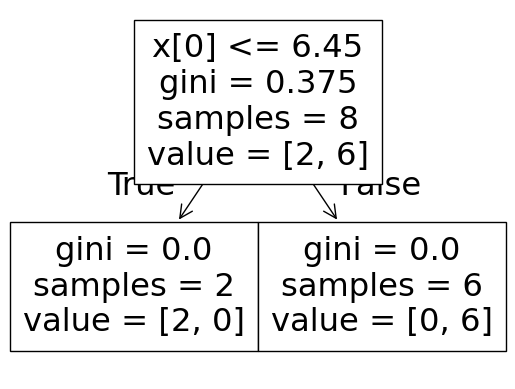

0.8


C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


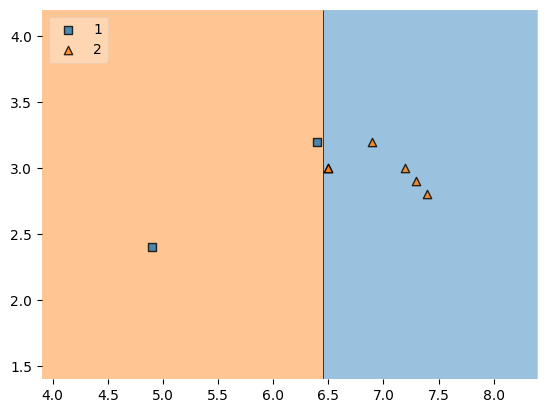

In [26]:
# decision tree 1
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
dt1=DecisionTreeClassifier()
evaluate(dt1,X,y)


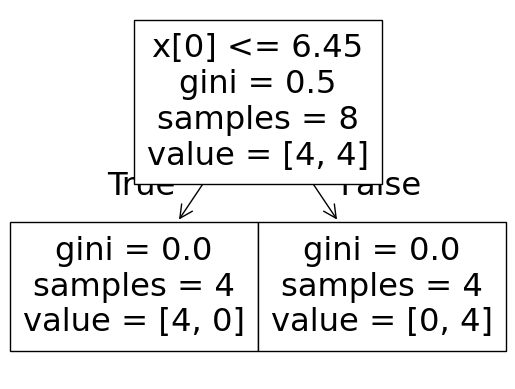

0.8


C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


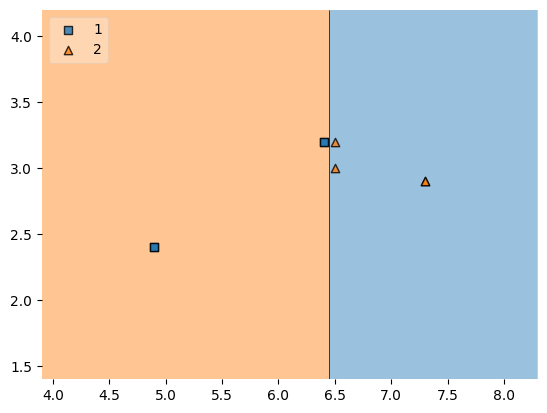

In [27]:
# decision tree 2
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
dt2=DecisionTreeClassifier()
evaluate(dt2,X,y)



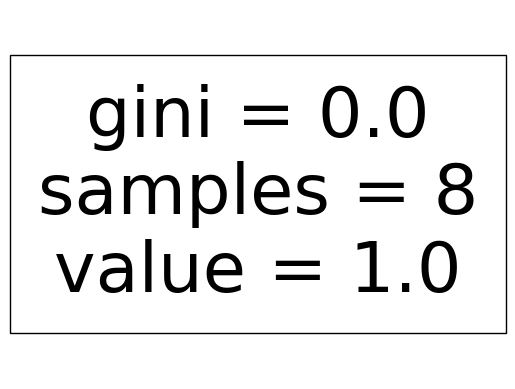

0.6


C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


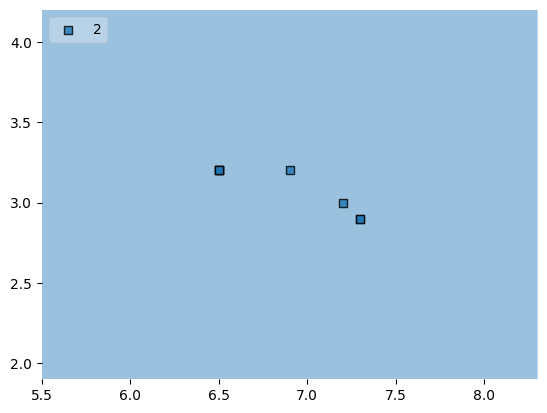

In [28]:
# decision tree 3
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
dt3=DecisionTreeClassifier()
evaluate(dt3,X,y)


In [29]:
# prediction 
df_test

,sepal_length,sepal_width,species
79,5.7,2.6,1
101,5.8,2.7,2
111,6.4,2.7,2
136,6.3,3.4,2
109,7.2,3.6,2


In [30]:
for i in range(df_test.shape[0]):
    arr=df_test.iloc[[i],0:2]
    print(np.array(arr).reshape(1,2))
    print("Predictor 1",dt1.predict(np.array(arr).reshape(1,2)))
    print("Predictor 2",dt2.predict(np.array(arr).reshape(1,2)))
    print("Predictor 3",dt3.predict(np.array(arr).reshape(1,2)))

[[5.7 2.6]]
Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]
[[5.8 2.7]]
Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]
[[6.4 2.7]]
Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]
[[6.3 3.4]]
Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]
[[7.2 3.6]]
Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid